In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df= pd.read_csv(clinical_trial_data_to_load )

# Combine the data into a single dataset
combined_df = pd.merge(mouse_df,clinical_df,on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group = combined_df.groupby(["Drug","Timepoint"])

mean_tumor_volume = group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_df = pd.DataFrame(mean_tumor_volume)
# Preview DataFrame
mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = group["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
standard_df = pd.DataFrame(standard_error)
# Preview DataFrame
standard_df.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977

In [8]:
std_error = standard_df.pivot_table(index = "Timepoint",columns="Drug",values="Tumor Volume (mm3)").reset_index()
std_error

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


In [9]:
# Minor Data Munging to Re-Format the Data Frames
df_clean = mean_df.pivot_table(index = "Timepoint",columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
df_clean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


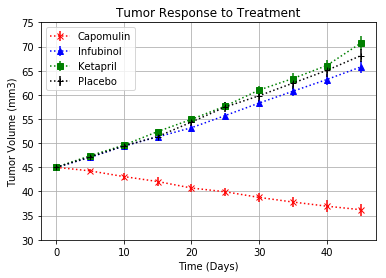

In [18]:
# Generate the Plot (with Error Bars)
reset_df = df_clean.reset_index()
drugs=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.errorbar(reset_df["Timepoint"],reset_df["Capomulin"], yerr= std_error["Capomulin"],marker="x", linestyle = ":", color = "r")

plt.errorbar(reset_df["Timepoint"],reset_df["Infubinol"], yerr= std_error["Infubinol"], marker = "^", linestyle = ":", color = "blue")

plt.errorbar(reset_df["Timepoint"],reset_df["Ketapril"], yerr= std_error["Ketapril"], marker = "s", linestyle = ":", color = "green")

plt.errorbar(reset_df["Timepoint"],reset_df["Placebo"], yerr= std_error["Placebo"], marker = "+", linestyle = ":", color = "black")

plt.legend(loc="upper left")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(0,45,10))
plt.yticks(np.arange(30,76,5))
plt.grid()

# # Save the Figure
plt.savefig("Tumor Response to Treatment.png")

In [20]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_df.head()

meta_df = combined_df.groupby(["Drug", "Timepoint"])

mean_meta = meta_df['Metastatic Sites'].mean()

# Convert to DataFrame

mean_meta_df = pd.DataFrame(mean_meta)

# Preview DataFrame
mean_meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [21]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_meta = meta_df["Metastatic Sites"].sem()
# Convert to DataFrame
std_meta_df = pd.DataFrame(std_meta)
# Preview DataFrame
std_meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [22]:
# Minor Data Munging to Re-Format the Data Frames
final_meta_df = mean_meta_df.reset_index().pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
final_meta_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


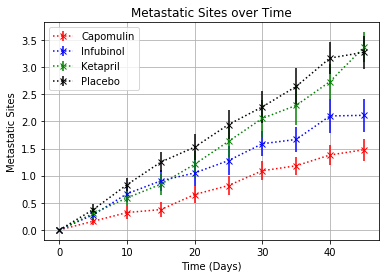

In [23]:
# Generate the Plot (with Error Bars)
plot_meta_df = final_meta_df.reset_index()
plot_meta_df_err = std_meta_df.pivot_table(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

plt.errorbar(plot_meta_df["Timepoint"],plot_meta_df["Capomulin"],yerr=plot_meta_df_err["Capomulin"], marker = "x", color = "r", linestyle = ':')

plt.errorbar(plot_meta_df["Timepoint"],plot_meta_df["Infubinol"],yerr=plot_meta_df_err["Infubinol"], marker = "x", color = "b", linestyle = ':')

plt.errorbar(plot_meta_df["Timepoint"],plot_meta_df["Ketapril"],yerr=plot_meta_df_err["Ketapril"], marker = "x", color = "g", linestyle = ':')

plt.errorbar(plot_meta_df["Timepoint"],plot_meta_df["Placebo"],yerr=plot_meta_df_err["Placebo"], marker = "x", color = "black", linestyle = ':')


plt.title("Metastatic Sites over Time")
plt.legend(loc="best")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
# Save the Figure
plt.savefig("Metastatic Sites over Time.png")
# Show the Figure

In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = combined_df.groupby(["Drug","Timepoint"])
count_mice_ex = count_mice["Mouse ID"].count()
# Convert to DataFrame
count_mice_df = pd.DataFrame(count_mice_ex).rename(columns={"Mouse ID" : "Mouse Count"}).reset_index()
# Preview DataFrame
count_mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [29]:
count_mice_pvt = count_mice_df.pivot_table(index="Timepoint", columns = "Drug", values = "Mouse Count").reset_index()
count_mice_pvt

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [30]:
count_mice_pvt.iloc[0,1]

25

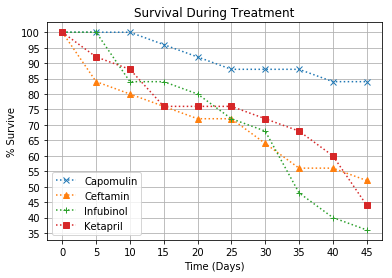

In [37]:
# Generate the Plot (Accounting for percentages)

#Convert to percent
mice_surv = []
for y in range(1,5):
    total = count_mice_pvt.iloc[0,y]
    for x in range(0,10):
        mice_surv.append((count_mice_pvt.iloc[x,y]/total)*100)

mice_surv_capomulin = mice_surv[0:10]
mice_surv_ceftamin = mice_surv[10:20]
mice_surv_infubinol = mice_surv[20:30]
mice_surv_ketapril = mice_surv[30:40]

perc_df = pd.DataFrame({"Capomulin":mice_surv_capomulin,
                        "Ceftamin" :mice_surv_ceftamin,
                        "Infubinol":mice_surv_infubinol,
                        "Ketapril" :mice_surv_ketapril   
                       })

markers = ["x","^","+","s"]
perc_df

for x in range(4):
    plt.plot(count_mice_pvt["Timepoint"],perc_df.iloc[:,x], linestyle=":", marker=markers[x])
    
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("% Survive")
plt.yticks(np.arange(35,101,5))
plt.xticks(np.arange(0,46,5))
plt.grid()
plt.savefig("Survival During Treatment.png")

In [41]:
df_clean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Text(0,0.5,'% Tumor Growth')

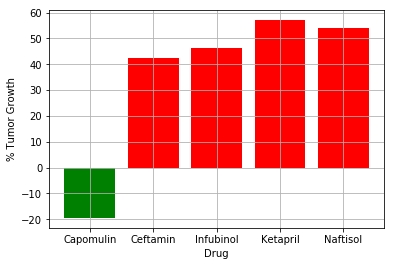

In [46]:
# Store all Relevant Percent Changes into a Tuple
tumor_growth = []
for y in range(5):
    
    growth = (df_clean.iloc[9,y]/df_clean.iloc[0,y]-1)*100
    tumor_growth.append(growth)
    
drug_names = list(df_clean.columns)
drug_pct = []

[drug_pct.append(str(round(x,2))+"%") for x in tumor_growth]

plt.bar(np.arange(len(tumor_growth)),tumor_growth,tick_label=drug_names[0:5],color=["g","r","r","r","r"])
plt.grid(which="major")
plt.xlabel("Drug")
plt.ylabel("% Tumor Growth")

# #plt.annotate(str(drug_pct).replace("'","").replace("[","").replace("]","").replace(",",""),[0,0],xycoords="data")

[plt.annotate(drug_pct[x],[x-0.25,0], color="w") for x in range(1,5)]
plt.annotate(drug_pct[0],[-0.25,0])
plt.savefig("Summary Bar Graph.png")

# # Splice the data between passing and failing drugs
# # Orient widths. Add labels, tick marks, etc. 
# # Use functions to label the percentages of changes
# # Call functions to implement the function calls
# # Save the Figure
# # Show the Figure